```
From: https://github.com/ksatola
Version: 0.0.1

TODOs
1. 3.1.1.2. in https://scikit-learn.org/stable/modules/cross_validation.html
2. https://scikit-learn.org/stable/modules/grid_search.html#grid-search
```

# Cross-Validation (CV)

**[Cross validation (CV)](https://en.wikipedia.org/wiki/Cross-validation_(statistics))**, sometimes called `rotation estimation` or `out-of-sample testing` is an essential tool in statistical learning to estimate the performance of your algorithm (how the results of a statistical analysis will generalize to an independent dataset). Despite its great power it also exposes some fundamental risk when done wrong which may terribly bias your performance estimate.

During cross-validation, we are typically trying to understand how well our model can generalize, and how well it can predict our outcome of interest on unseen samples.

**Cross validation** involves splitting the training dataset of observations into k non overlapping groups (or folds) of approximately equal size. One fold is treated as a validation set, and the machine learning algorithm is trained on the remaining k-1 folds. The mean squared error - MSE -  (or another metric) is then computed on the validation fold. This procedure is repeated k times; each time, a different group of observations is treated as a validation set.

<img src="images/cross_validation_kfold.png" alt="" style="width: 600px;"/>

This process results in k estimates of the MSE quantity, namely MSE1, MSE2, ...MSEk. The cross validation estimate for the MSE is then computed by simply averaging these values:

<img src="images/cross_validation_mse.png" alt="" style="width: 400px;"/>

This value is an estimate, say MSE_hat, of the real MSE and our goal is to make this estimate as accurate as possible. MSE is just one for the possible metrics you can estimate using cross validation. **The evaluation metrics should always report on generalization performance.** For more, see [sklearn implementation of CV](https://scikit-learn.org/stable/modules/cross_validation.html).

In [1]:
# Connect with underlying Python code
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../src')

In [3]:
from datasets import (
    get_dataset,
)

In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [92]:
from model import (
    #check_classification_performance,
    #get_models_for_classification,
    get_oversampling_methods,
    #select_models,
)

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit, RepeatedKFold

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost

In [5]:
# target = 'class'
df = get_dataset('pima-indians-diabetes')
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df["class"].value_counts(dropna=False)

0    500
1    268
Name: class, dtype: int64

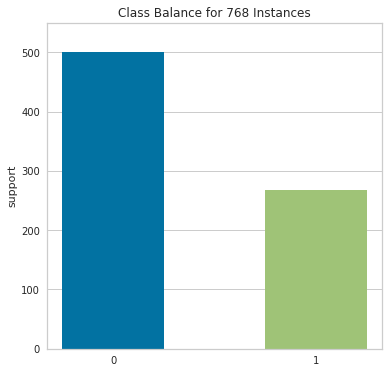

<AxesSubplot:title={'center':'Class Balance for 768 Instances'}, ylabel='support'>

In [38]:
from yellowbrick.classifier import ClassBalance

fig, ax = plt.subplots(figsize=(6, 6))
cb_viz = ClassBalance(labels=["0", "1"])
cb_viz.fit(df["class"].values.reshape(-1, 1).flatten())
cb_viz.poof()
#fig.savefig("images/class_balance.png", dpi=300)

In [13]:
# Show percent of missing values per column
df.isnull().mean() * 100

preg     0.0
plas     0.0
pres     0.0
skin     0.0
test     0.0
mass     0.0
pedi     0.0
age      0.0
class    0.0
dtype: float64

(537, 8) (231, 8) (537,) (231,)


## Cross Validation Techniques
see TODO

### K-fold

### Repeated K-Fold
[RepeatedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedKFold.html#sklearn.model_selection.RepeatedKFold) repeats K-Fold n times. It can be used when one requires to run KFold n times, producing different splits in each repetition.

In [72]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
random_state = 12883823
cv = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
for train, test in cv.split(X):
    print("%s %s" % (train, test))

[2 3] [0 1]
[0 1] [2 3]
[0 2] [1 3]
[1 3] [0 2]


### Leave One Out (LOO)
[LeaveOneOut (or LOO)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html#sklearn.model_selection.LeaveOneOut) is a simple cross-validation. Each learning set is created by taking all the samples except one, the test set being the sample left out. Thus, for  samples, we have  different training sets and  different tests set. This cross-validation procedure does not waste much data as only one sample is removed from the training set:

In [73]:
from sklearn.model_selection import LeaveOneOut

X = [1, 2, 3, 4]
loo = LeaveOneOut()
for train, test in loo.split(X):
    print("%s %s" % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


### Leave P Out (LPO)

### Random permutations cross-validation a.k.a. Shuffle & Split

### Stratified k-fold

## Feature Selection and Cross Validation
It is a common malpractice to perform feature selection before we go into cross-validation, something that should however be done during cross-validation, so that the selected features are only derived from training data, and not from pooled training and validation data.

In [166]:
y = df["class"]
X = df.drop(columns='class')
y.value_counts(dropna=False)

0    500
1    268
Name: class, dtype: int64

In [156]:
from sklearn.datasets import make_classification

# Define dataset with 1,000 examples and 10 input features, five of which are important and five of which are redundant
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1, weights=[.9])
# summarize the dataset
print(X.shape, y.shape)
pd.Series(y).value_counts(dropna=False)

(1000, 10) (1000,)


0    897
1    103
dtype: int64

In [167]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state=42)
X, y = oversample.fit_resample(X, y)
y.value_counts(dropna=False)

1    500
0    500
Name: class, dtype: int64

In [157]:
from imblearn.over_sampling import (
    RandomOverSampler,
)

oversample = RandomOverSampler(random_state=42)
X, y = oversample.fit_sample(X, y)
#y.value_counts(dropna=False)

In [97]:
# Feature selection before CV (for comparison)
#corr = df.corr()['class']
#corr_sorted = corr.sort_values(ascending=False)
#corr_sorted.head()

In [168]:



# Use highly correlated features
#X = X[['plas', 'mass']]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(700, 8) (300, 8) (700,) (300,)


In [169]:
for model in [
    #DummyClassifier,
    #LogisticRegression,
    DecisionTreeClassifier,
    KNeighborsClassifier,
    GaussianNB,
    SVC,
    RandomForestClassifier,
    xgboost.XGBClassifier,
]:
    
    cls = model()
    #cv = KFold(n_splits=5, random_state=42, shuffle=True)
    cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    #cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
    #cv = ShuffleSplit(n_splits=5, random_state=42)
    #scores = cross_val_score(cls, X_train, y_train, scoring="roc_auc", cv=cv)
    scores = cross_val_score(cls, X_train, y_train, scoring="f1", cv=cv)

    print(f"{model.__name__:22}  F1-score: "
          f"{scores.mean():.3f} STD: {scores.std():.2f} ")
    
# Other scoring params: 
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

DecisionTreeClassifier  F1-score: 0.697 STD: 0.04 
KNeighborsClassifier    F1-score: 0.725 STD: 0.03 
GaussianNB              F1-score: 0.719 STD: 0.02 
SVC                     F1-score: 0.687 STD: 0.03 
RandomForestClassifier  F1-score: 0.786 STD: 0.02 
XGBClassifier           F1-score: 0.756 STD: 0.03 


In [170]:
y = df["class"]
X = df.drop(columns='class')
y.value_counts(dropna=False)

# Define dataset with 1,000 examples and 10 input features, five of which are important and five of which are redundant
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1, weights=[.9])
# summarize the dataset
#print(X.shape, y.shape)
#pd.Series(y).value_counts(dropna=False)

#X = pd.DataFrame(X)
#y = pd.Series(y)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(537, 8) (231, 8) (537,) (231,)


In [171]:
from sklearn.metrics import f1_score
#from statistics import mean, std

for model in [
    #DummyClassifier,
    #LogisticRegression,
    DecisionTreeClassifier,
    KNeighborsClassifier,
    GaussianNB,
    SVC,
    RandomForestClassifier,
    xgboost.XGBClassifier,
]:

    cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    scores = []
    fold_count = 0

    for train, val in cv.split(X_train, y_train):
        #print(f"Processing fold {fold_count}")

        # Select df rows based on list index
        X_train_fold = X_train.iloc[train]
        X_val_fold = X_train.iloc[val]

        y_train_fold = y_train.iloc[train]
        y_val_fold = y_train.iloc[val]

        # Oversample
        #oversample = SMOTE(random_state=42)
        #X_train_fold, y_train_fold = oversample.fit_resample(X_train_fold, y_train_fold)
        #print(y_train_fold.value_counts(dropna=False))

        oversample = RandomOverSampler(random_state=42)
        X_train_fold, y_train_fold = oversample.fit_sample(X_train_fold, y_train_fold)

        # Train
        cls = model()
        cls.fit(X_train_fold, y_train_fold)

        # Predict & score
        pred = cls.predict(X_val_fold)
        scores.append(f1_score(y_val_fold, pred))

        fold_count += 1
        
    scores = pd.Series(scores)

    print(f"{model.__name__:22}  F1-score: "
          f"{scores.mean():.3f} STD: {scores.std():.2f} ")




DecisionTreeClassifier  F1-score: 0.485 STD: 0.06 
KNeighborsClassifier    F1-score: 0.580 STD: 0.03 
GaussianNB              F1-score: 0.644 STD: 0.06 
SVC                     F1-score: 0.626 STD: 0.03 
RandomForestClassifier  F1-score: 0.644 STD: 0.04 
XGBClassifier           F1-score: 0.585 STD: 0.07 


In [ ]:
  train_fold = df.ix[train]
  test_fold = df.ix[test]

  # find best features
  corr = train_fold.corr()['target'][train_fold.corr()['target'] < 1].abs()
  corr.sort(ascending=False)
  features = corr.index[[0,1]].values

  # Get training examples
  train_fold_input = train_fold[features].values
  train_fold_output = train_fold['target']

  # Fit logistic regression
  logreg = LogisticRegression()
  logreg.fit(train_fold_input, train_fold_output)

  # Check MSE on test set
  pred = logreg.predict(test_fold[features])
  mse.append(mean_squared_error(test_fold.target, pred))

  # Done with the fold
  fold_count += 1

print(DataFrame(mse).mean())

Great! Out of the 10.000 features we have been able to select two of them, i.e. feature number 8487 and 3555 that have a 0.42 and 0.39 correlation with the output. At this point let’s just drop all the other columns and use these two features to train a simple LogisticRegression. We then use scikit-learn cross_val_score to compute MSE^ which in this case is equal to 0.249. Pretty good!

Note [1]: I am using MSE here to evaluate the quality of the logistic regression, but you should probably consider using a Chi-squared test. The interpretation of the results that follows is equivalent. https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test

Note [2]: By default scikit-learn use Stratified KFold3 where the folds are made by preserving the percentage of samples for each class.

In [ ]:
# Start the training

features = corr.[[0,1]].values
training_input = df[features].values
training_output = df['target']
logreg = LogisticRegression()

# scikit learn return the negative value for MSE
# http://stackoverflow.com/questions/21443865/scikit-learn-cross-validation-negative-values-with-mean-squared-error
mse_estimate = -1 * cross_val_score(logreg, training_input, training_output, cv=10, scoring='mean_squared_error')

mse_estimate
# array([ 0.45454545, 0.2, 0.2, 0.1, 0.1,
#        0., 0.3, 0.4, 0.3, 0.44444444])

DataFrame(mse_estimate).mean()
# 0 0.249899
# dtype: float64

### Knowledge leaking
According to the previous estimate we built a system that can predict a random noise target from a random noise input with a MSE of just 0.249. The result is, as you can expect, wrong. But why?

The reason is rather counterintuitive and this is why this mistake is so common4. When we applied the feature selection we used information from both the training set and the test sets used for the cross validation, i.e. the correlation values. As a consequence our LogisticRegression knew information in the test sets that were supposed to be hidden to it. In fact, when you are computing MSEi in the i-th iteration of the cross validation you should be using only the information on the training fold, and nothing should come from the test fold. In our case the model did indeed have information from the test fold, i.e. the top correlated features. I think the term knowledge leaking express this concept fairly well.

The schema that follows shows you how the knowledge leaked into the LogisticRegression because the feature selection has been applied before the cross validation procedure started. The model knows something about the data highlighted in yellow that it shoulnd’t know, its top correlated features.

<img src="images/cross_validation3.png" alt="" style="width: 600px;"/>

In the figure above, the test input means validation fold input. The real test dataset is hold out and never used in cross validation.

To check that we were actually wrong let’s do the following:
* Take out a portion of the data set (take_out_set).
* Train the LogisticRegression on the remaining data using the same feature selection we did before.
* After the training is done check the MSE on the take_out_set.

Is the MSE on the take_out_set similar to the MSE^ we estimated with the CV? The answer is no, and we got a much more reasonable MSE of 0.53 that is much higher than the MSE^ of 0.249.

In [ ]:
take_out_set = df.ix[random.sample(df.index, 30)]
training_set = df[~(df.isin(take_out_set)).all(axis=1)]

corr = training_set.corr()['target'][df.corr()['target'] < 1].abs()
corr.sort(ascending=False)
features = corr.index[[0,1]].values

training_input = training_set[features].values
training_output = training_set['target']

logreg = LogisticRegression()
logreg.fit(training_input, training_output)

# LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
# intercept_scaling=1, max_iter=100, multi_class='ovr',
# penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
# verbose=0)

y_take_out = logreg.predict(take_out_set[features])
mean_squared_error(take_out_set.target, y_take_out)
# 0.53333333333333333

### Cross Validation Done Right
In the previous section we have seen that if you inject test knowledge in your model your cross validation procedure will be biased. To avoid this let’s compute the features correlation during each cross validation batch. The difference is that now the features correlation will use only the information in the training fold instead of the entire dataset. That’s the key insight causing the bias we saw previously. The following graph shows you the revisited procedure. This time we got a realistic MSE^ of 0.44 that confirms the data is randomly distributed.

<img src="images/cross_validation4.png" alt="" style="width: 600px;"/>

In [ ]:
kf = StratifiedKFold(df['target'], n_folds=10)
mse = []
fold_count = 0
for train, test in kf:
  print("Processing fold %s" % fold_count)
  train_fold = df.ix[train]
  test_fold = df.ix[test]

  # find best features
  corr = train_fold.corr()['target'][train_fold.corr()['target'] < 1].abs()
  corr.sort(ascending=False)
  features = corr.index[[0,1]].values

  # Get training examples
  train_fold_input = train_fold[features].values
  train_fold_output = train_fold['target']

  # Fit logistic regression
  logreg = LogisticRegression()
  logreg.fit(train_fold_input, train_fold_output)

  # Check MSE on test set
  pred = logreg.predict(test_fold[features])
  mse.append(mean_squared_error(test_fold.target, pred))

  # Done with the fold
  fold_count += 1

print(DataFrame(mse).mean())

# Processing fold 0
# Processing fold 1
# Processing fold 2
# Processing fold 3
# Processing fold 4
# Processing fold 5
# Processing fold 6
# Processing fold 7
# Processing fold 8
# Processing fold 9

DataFrame(mse).mean()
# 0 0.441212
# dtype: float64

If you want to make sure you don’t leak info across the train and test set scikit learn gives you additional extra tools like the feature selection pipeline5 and the classes inside the feature selection module6.



## Cross-validation on Imbalanced Data

Let’s now have a look at one of the most typical mistakes when using cross validation. When cross validation is done wrong its result does not reflect reality. In other words, you may think that you just found a perfect machine learning algorithm with incredibly good performance metric, while in reality you simply wrongly applied CV.

There is a major issue in most clinical research, i.e. how to properly cross-validate when we have imbalanced data. As a matter of fact, in the context of many medical applications, we have datasets where we have two classes for the main outcome; normal samples and relevant samples. For example in a cancer detection application we might have a small percentages of patients with cancer (relevant samples) while the majority of samples might be healthy individuals. Outside of the medical space, this is true (even more) for the case for example of fraud detection, where the rate of relevant samples (i.e. frauds) to normal samples might be even in the order of 1 to 100 000.

Typically, classifiers are more sensitive to detecting the majority class and less sensitive to the minority class. Thus, if we don't take care of the issue, the classification output will be biased, in many cases resulting in always predicting the majority class. 

What can we do when we have imbalanced data? Mainly three things:
- **Ignoring the problem.** Building a classifier using the data as it is, would in most cases give us a prediction model that always returns the majority class. The classifier would be biased.
- **Undersampling the majority class.** Simply select n samples at random from the majority class, where n is the number of samples for the minority class, and use them during training phase, after excluding the sample to use for validation.
- **Oversampling the minority class.** The easiest way to oversample is to re-sample the minority class, i.e. to duplicate the entries, or manufacture data which is similar to the data what we have already.

### Oversampling the Minority Class

Oversampling the minority class can result in overfitting problems if we oversample before cross-validating. What is wrong with oversampling before cross-validating? Let’s consider the simplest oversampling method ever, as an example that clearly explains this point.

The easiest way to oversample is to re-sample the minority class, i.e. to duplicate the entries, or manufacture data which is exactly the same as what we have already. Now, if we do so before cross-validating, i.e. before we enter the leave one participant out cross-validation loop, we will be training the classifier using N-1 entries, leaving 1 out, but including in the N-1 one or more instances that are exactly the same as the one being validated. Thus, defeating the purpose of cross-validation altogether. Let's have a look at this issue graphically:

<img src="images/cross-validation1.jpg" alt="" style="width: 400px;"/>

From left to right, we start with the original dataset where we have a minority class with two samples. We duplicate those samples, and then we do cross-validation. At this point there will be iterations, such as the one showed, where the training and validation set contain the same sample, resulting in overfitting and misleading results. Here is how this should be done:

<img src="images/cross-validation2.jpg" alt="" style="width: 400px;"/>

First, we start cross-validating. This means that at each iteration we first exclude the sample to use as validation set, and then oversample the remaining of the minority class (in orange). In this toy example we had only two samples, so we created three instances of the same. The difference from before, is that clearly now we are not using the same data for training and validation. Therefore we will obtain more representative results. The same holds even if we use other cross-validation methods, such as k-fold cross-validation.

This was a simple example, and better methods can be used to oversample. One of the most common being the SMOTE technique, i.e. a method that instead of simply duplicating entries creates entries that are interpolations of the minority class, as well as undersamples the majority class. Normally when we duplicate data points the classifiers get very convinced about a specific data point with small boundaries around it, as the only point where the minority class is valid, instead of generalizing from it. However, SMOTE effectively forces the decision region of the minority class to become more general, partially solving the generalization problem. There are some pretty neat visualizations in the original paper, so I would advice to have a look [here](https://github.com/STAC-IITMandi/Exoplanet-Detection/blob/master/live-953-2037-jair.pdf). 

However, something to keep in mind is that while oversampling using SMOTE does improve the decision boundaries, it has nothing to do with cross-validation. If we use the same data for training and validation, results will be dramatically better than what they would be with out of sample data. The same problem that I highlighted above with a simpler example, is still present. Let’s see what results we can get when oversampling before cross-validation.

#### Bad cross-validation when oversampling
Here is the code, we first oversample then we go into the cross-validation loop, with our synthetic samples that are basically interpolations of the original ones:

```
develop python code here
```

Results are pretty good now. Especially for random forests, we obtained auc = 0.93 without any feature engineering, simply using what was provided in the dataset, and without any parameter tuning for the classifier. Once again, apart from the differences in the two oversampling methods (replication of the minority class or SMOTE), the issue here is not even which method to use, but when to use it. Using oversampling before cross-validation we have now obtained almost perfect accuracy, i.e. we overfitted (even a simple classification tree gets auc = 0.84). 

#### Proper cross-validation when oversampling
The way to proper cross validate when oversampling data is rather simple. Exactly like we should do feature selection inside the cross validation loop, we should also oversample inside the loop. It makes no sense to create instances based on our current minority class and then exclude an instance for validation, pretending we didn’t generate it using data that is still in the training set. This time we oversample inside the cross-validation loop, after the validation sample has already been removed from the training data, so that we create synthetic data by interpolating only recordings that will not be used for validation. Our cross validation iterations will now be the same as the number of your samples. See the code

```
develop python code here
```
And finally, results when doing proper cross-validation with oversampling using the SMOTE technique:

As expected, more data didn't solve any problem, regardless of doing "smart" oversampling using SMOTE. What did bring very high accuracy, was simply overfitting.

To summarize, when cross-validating with oversampling, do the following to make sure your results are generalizable:
- Inside the cross-validation loop, get a sample out and do not use it for anything related to features selection, oversampling or model building.
- Oversample your minority class, without the sample you already excluded.
- Use the excluded sample for validation, and the oversampled minority class + the majority class, to create the model.
- Repeat n times, where n is your number of samples (if doing leave one participant out cross-validation).